In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

# 1. 加载数据（请根据实际情况修改文件路径及特征名称）
data = pd.read_excel("补充材料.xlsx", header=None)
# 假设数据集包含多个特征，我们选择所有数值型特征进行建模
X_scaled = data.select_dtypes(include=[np.number])  # 选择数值型特征


n_neighbors = 20

# 定义需要遍历的阈值范围（LOF分数）
thresholds = [-1.5, -1.4, -1.3, -1.2]

# 用于存储每个阈值下的评估结果
results = []

# 构建 LOF 模型（此处不设 contamination 参数，直接使用 LOF 分数进行筛选）
lof = LocalOutlierFactor(n_neighbors=n_neighbors)
# 使用 fit_predict() 进行拟合和预测
y_pred = lof.fit_predict(X_scaled)
# 获取负离群因子（LOF 分数）
lof_scores = lof.negative_outlier_factor_

# 遍历不同阈值，计算异常点数量
for threshold in thresholds:
    # 根据阈值判断异常：LOF 分数低于阈值的认为是异常
    outlier_mask = lof_scores < threshold
    outlier_count = np.sum(outlier_mask)
    results.append({
        'threshold': threshold,
        'outlier_count': outlier_count
    })

# 将结果转换为 DataFrame 查看
results_df = pd.DataFrame(results)
print(results_df)

   threshold  outlier_count
0       -1.5             64
1       -1.4             94
2       -1.3            150
3       -1.2            259


In [2]:
selected_threshold = -1.23

# 将预测结果及LOF分数添加到原始数据中
data['prediction'] = y_pred  # 1 为正常，-1 为异常
data['lof_scores'] = lof_scores
# 根据选定的阈值重新判断异常（以防不同于 fit_predict 结果）
data['outlier'] = lof_scores < selected_threshold

# 筛选正常数据（这里依据 prediction==1 或不在异常mask内，两者可视情况选择）
normal_data = data[~data['outlier']]

# 将正常数据导出到新的 Excel 文件中
normal_data.to_excel("threshold_data.xlsx", index=False)

print(f"选定参数下（n_neighbors={n_neighbors}, threshold={selected_threshold}）：")
print(f"正常数据数量：{normal_data.shape[0]}, 异常数据数量：{data.shape[0] - normal_data.shape[0]}")

选定参数下（n_neighbors=20, threshold=-1.23）：
正常数据数量：1213, 异常数据数量：218


G:\ana\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20915 missing from current font.
  font.set_text(s, 0.0, flags=flags)
G:\ana\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 31574 missing from current font.
  font.set_text(s, 0.0, flags=flags)
G:\ana\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
G:\ana\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
G:\ana\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
G:\ana\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 30340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
G:\ana\lib\site-packages\matplotlib\backends\backend_agg.p

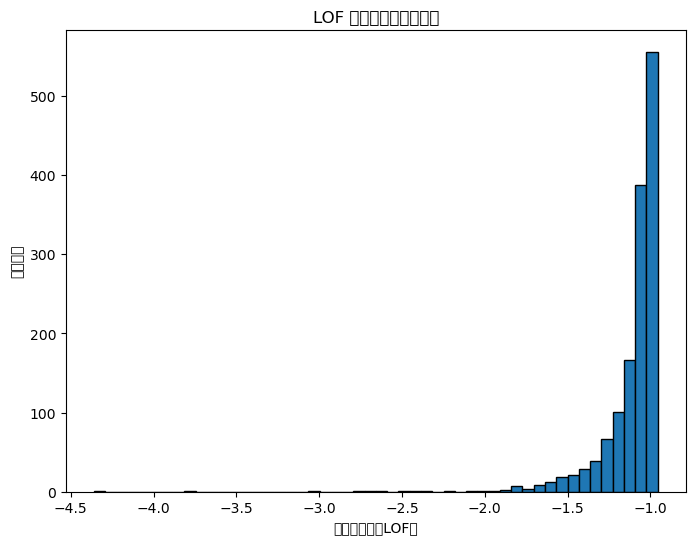

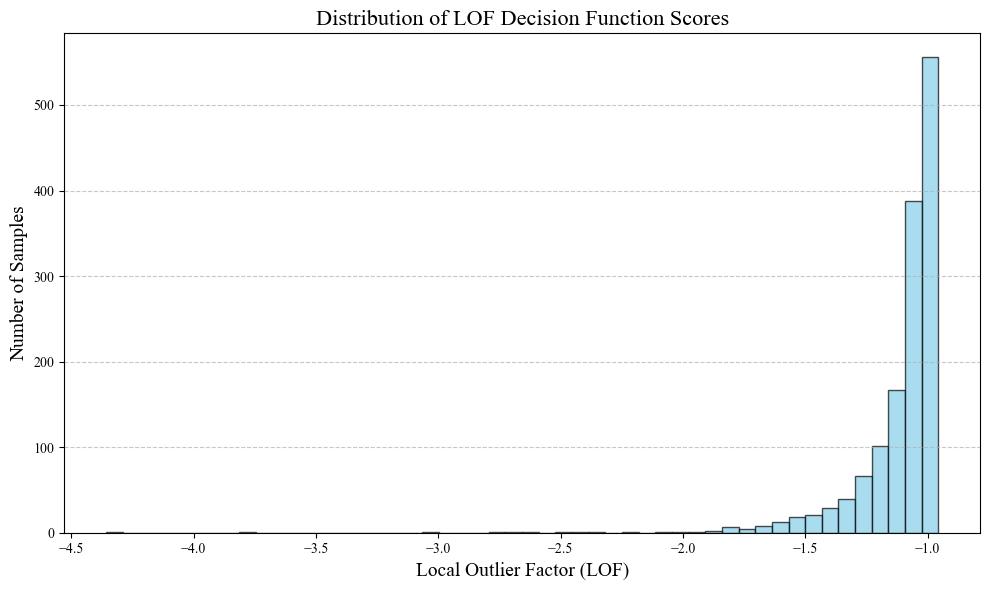

In [5]:

# 绘制 LOF 决策函数分数的分布
plt.figure(figsize=(10, 6))

# 设置字体为新罗马
plt.rcParams['font.family'] = 'Times New Roman'

# 绘制直方图
plt.hist(lof_scores, bins=50, edgecolor='k', color='skyblue', alpha=0.7)

# 添加标题和标签
plt.title('Distribution of LOF Decision Function Scores', fontsize=16)
plt.xlabel('Local Outlier Factor (LOF)', fontsize=14)
plt.ylabel('Number of Samples', fontsize=14)

# 添加网格线
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 显示图形
plt.savefig('lof_distribution.png', dpi=300, bbox_inches='tight')

# 显示图形
plt.tight_layout()  # 自动调整布局
plt.show()
